# Image Classification using SVM
This notebook loads image data, flattens it, and trains an SVM classifier. 

In [32]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import joblib
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

In [49]:
class_names = ['Buffalo', 'cat', 'dog', 'Elephant', 'Rhino', 'Zebra','lion','deer','horse']
DATA_DIR = "Data"
img_size = 64

X = []
y = []

print("Loading images...")
for idx, class_name in enumerate(class_names):
    folder = os.path.join(DATA_DIR, class_name)
    for filename in os.listdir(folder): 
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        if img is None:
            continue
        img = cv2.resize(img, (img_size, img_size))
        img = img / 255.0  
        X.append(img.flatten()) 
        y.append(idx)

X = np.array(X)
y = np.array(y)

print(f"Loaded {len(X)} images.")

Loading images...
Loaded 9000 images.


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [54]:
model_path = Path("svm_model.joblib")
if model_path.exists():
    print(" Loading existing LinearSVC model...")
    svm_model = joblib.load(model_path)
else:
    print(" Training new LinearSVC model...")
    svm_model = LinearSVC(
        C=1.0,
        max_iter=50,
        verbose=1,
        dual=False,
        random_state=42
    )
    svm_model.fit(X_train_scaled, y_train)
    joblib.dump(svm_model, model_path)
    print(" Model saved to disk.")

 Training new LinearSVC model...
[LibLinear] Model saved to disk.


Classification Report:
               precision    recall  f1-score   support

     Buffalo       0.60      0.52      0.55       195
         cat       0.65      0.58      0.61       211
         dog       0.56      0.56      0.56       179
    Elephant       0.47      0.53      0.50       191
       Rhino       0.47      0.51      0.49       203
       Zebra       0.61      0.45      0.52       207
        lion       0.49      0.67      0.57       209
        deer       0.69      0.55      0.61       204
       horse       0.41      0.47      0.44       201

    accuracy                           0.54      1800
   macro avg       0.55      0.54      0.54      1800
weighted avg       0.55      0.54      0.54      1800



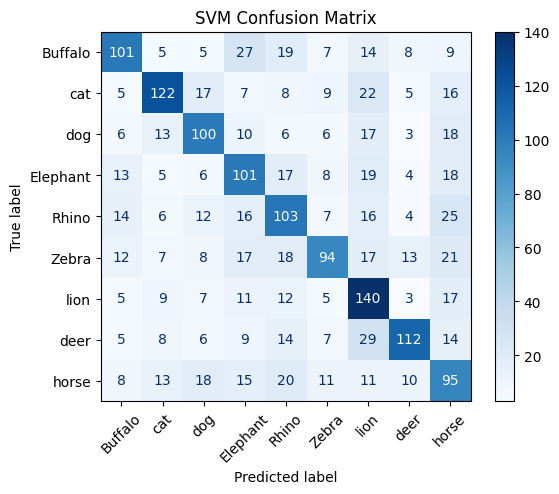

In [52]:
y_pred = svm_model.predict(X_test_scaled)
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=class_names))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("SVM Confusion Matrix")
plt.show()